
# <p style="background-color:#C2C4E2;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">TUGAS AKHIR MICROCREDENTIAL ASSOCIATE DATA SCIENTIST ITS-05 KELOMPOK 3</p>


# <p style="background-color:#C2C4E2;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">PREFACE</p>

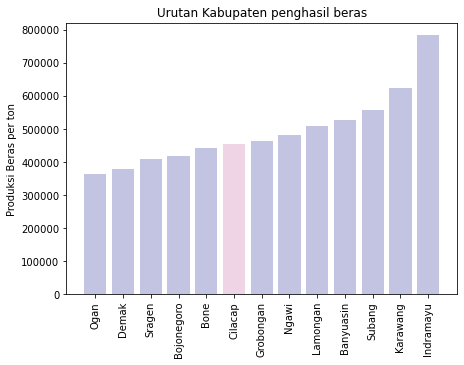

graph source : https://ekbis.sindonews.com/read/387244/34/inilah-25-kabupaten-produsen-beras-terbesar-indonesia-indramayu-di-urutan-pertama-1617613495

Tema : Prediksi Cuaca

Deskripsi Masalah : Indonesia merupakan Negara Agraris yang menghasilkan produk pertanian
dalam jumlah besar. Dalam hal ini tentu muncul berbagai tantangan yang dihadapi sektor pertanian
kita, salah satunya sulitnya memprediksi hujan. Dengan tidak menentunya cuaca menjadikan petani
sulit dapat melakukan kegiatan bertani mereka.

Kebutuhan Masalah : Diperlukan sebuah model machine learning yang dapat mempermudah petani
dalam memprediksi hujan.

Data : Menggunakan data kabupaten cilacap yang didapatkan dari website resmi BMKG

## <p style="background-color:#C2C4E2;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENT</p>

[1. IMPORT LIBRARY AND DATASET](#1)

[2. DATA CLEANING](#2) 
    
[3. EXPLORATORY DATA ANALYSIS](#3)  

[4. DATA PREPROCESSING](#4)     

[5. MODELING](#4) 

[6. CONCLUSION](#5) 

[7. END](#7) 



## <p style="background-color:#C2C4E2;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">1. IMPORT LIBRARY AND DATASET</p>

In [1]:
# Basic Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Visulization
import missingno as mno
from sklearn.metrics import confusion_matrix

# Pre-processing
from sklearn.preprocessing import StandardScaler


# Machine Learning
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Deep Learning
from keras.layers import Dense, Activation
from keras.models import Sequential

# Model Evaluation Metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


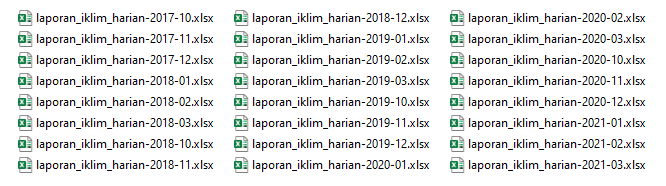

Untuk data yang kita gunakan, kita download langsung dari website resmi [BMKG](https://dataonline.bmkg.go.id/home). Kita gunakan data dari tahun 2017 hingga 2021.

Data kita bagi menjadi 4 periode :
* 2017-10 ~ 2018-03
* 2018-10 ~ 2019-03
* 2019-10 ~ 2020-03
* 2020-10 ~ 2021-03

In [2]:
ignore_data = ["8888"] # temporary, kalau ada ide buat ngolah nilai "8888", command ini bisa dihilangkan

df = pd.read_excel('dataset_iklim_cilacap_before_cleaning.xlsx', na_values = ignore_data)
df.head()

Tanggal    Tn    Tx  Tavg  RH_avg   RR   ss  ff_x  ddd_x  ff_avg ddd_car
0  01-10-2017  25.0  29.3  27.4    82.0  0.6  7.0   6.0  120.0     4.0      SE
1  02-10-2017  25.0  29.2  27.0    81.0  NaN  7.3   4.0  130.0     3.0      SE
2  03-10-2017  26.0  27.2  26.0    87.0  NaN  8.3   4.0  120.0     2.0      SE
3  04-10-2017  25.0  29.2  26.6    85.0  NaN  6.0   7.0  120.0     4.0      SE
4  05-10-2017  24.0  29.4  26.8    88.0  NaN  5.3   6.0  120.0     4.0      E


## <p style="background-color:#C2C4E2;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">2. DATA CLEANING</p>

**In this section** 
* Data Cleaning
* Feature Engineering 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tanggal  729 non-null    object 
 1   Tn       620 non-null    float64
 2   Tx       669 non-null    float64
 3   Tavg     724 non-null    float64
 4   RH_avg   723 non-null    float64
 5   RR       493 non-null    float64
 6   ss       694 non-null    float64
 7   ff_x     727 non-null    float64
 8   ddd_x    727 non-null    float64
 9   ff_avg   727 non-null    float64
 10  ddd_car  727 non-null    object 
dtypes: float64(9), object(2)
memory usage: 62.8+ KB


Berikut adalah keterangan data dari BMKG:

* 8888: data tidak terukur
* 9999: Tidak Ada Data (tidak dilakukan pengukuran)
* "Tn: Temperatur minimum	 (°C)"
* Tx: Temperatur maksimum (°C)
* Tavg: Temperatur rata-rata (°C)
* RH_avg: Kelembapan rata-rata (%)
* RR: Curah hujan (mm)
* ss: Lamanya penyinaran matahari (jam)
* ff_x: Kecepatan angin maksimum (m/s)
* ddd_x: Arah angin saat kecepatan maksimum (°)
* ff_avg: Kecepatan angin rata-rata (m/s)
* ddd_car: Arah angin terbanyak (°)

Dari informasi yang kita dapat ini, kita dapat melakukan beberapa hal :

* Fitur 'Tanggal' masih berbentuk object, karena kita ingin mengolah dataset ini sebagai timeseries data. Kita bisa ubah fitur 'Tanggal' ke bentuk datetime dan menjadikannya sebagai index
* Dari 'Tanggal', kita juga bisa lakukan feature engineer, menghasilkan fitur baru berupa 'Year', 'Month', dan 'Weekdays'
* 'ddd_car' masih berbentuk object yang kita bisa oleh ke bentuk categorical data
* Untuk mempermudah visualisasi kita dapat membagi data menjadi 4 kategori

In [4]:
# kita ingin mengolah dataset ini di domain timeseries
df['datetime'] = [datetime.strptime(x,'%d-%m-%Y') for x in df['Tanggal']] # change string 'Tanngal' to timeseries format

# change datetime as index; 
df = df.set_index('datetime')
df.drop('Tanggal', axis=1, inplace=True)

# change 'ddd_car' to categorical
df['ddd_car'] = pd.Categorical(df.ddd_car)

# renaming columns
df.rename(columns={"RR": "curah_hujan", "Tavg": "temp_avg", "RH_avg": "humid_avg", 
                   "ss": "sun_expo", "ff_x": "wind_max", "ff_avg": "wind_avg", "Tn": "temp_min", 
                   "Tx": "temp_max", "ddd_car": "wind_dir", "ddd_x": "wind_dir_max"}, inplace=True)



# Menambahkan kolom 'Year', 'Month', 'Weekday' untuk mempermudah visualisasi dan statiscical need
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday'] = df.index.weekday

# change to categorical
df['Year'] = pd.Categorical(df.Year)
df['Month'] = pd.Categorical(df.Month)

In [5]:
# missing data

df.isnull().sum()

temp_min        109
temp_max         60
temp_avg          5
humid_avg         6
curah_hujan     236
sun_expo         35
wind_max          2
wind_dir_max      2
wind_avg          2
wind_dir          2
Year              0
Month             0
Weekday           0
dtype: int64

In [6]:
# mengganti missing values di kolom curah_hujan dengan 0
df_filtered_1 = df.replace({'curah_hujan': np.nan},0)
df_filtered_1.head()

temp_min  temp_max  temp_avg  humid_avg  curah_hujan  sun_expo  \
datetime                                                                     
2017-10-01      25.0      29.3      27.4       82.0          0.6       7.0   
2017-10-02      25.0      29.2      27.0       81.0          0.0       7.3   
2017-10-03      26.0      27.2      26.0       87.0          0.0       8.3   
2017-10-04      25.0      29.2      26.6       85.0          0.0       6.0   
2017-10-05      24.0      29.4      26.8       88.0          0.0       5.3   

            wind_max  wind_dir_max  wind_avg wind_dir  Year Month  Weekday  
datetime                                                                    
2017-10-01       6.0         120.0       4.0       SE  2017    10        6  
2017-10-02       4.0         130.0       3.0       SE  2017    10        0  
2017-10-03       4.0         120.0       2.0       SE  2017    10        1  
2017-10-04       7.0         120.0       4.0       SE  2017    10        2  
2017-10-05       6.0         120.0       4.0       E   2017    10        3

In [7]:
# menghapus missing values perbaris di kolom curah hujan
df_filtered_2 = df.dropna(subset=['curah_hujan'])
df_filtered_2.head()

temp_min  temp_max  temp_avg  humid_avg  curah_hujan  sun_expo  \
datetime                                                                     
2017-10-01      25.0      29.3      27.4       82.0          0.6       7.0   
2017-10-06      26.0      29.8      28.0       84.0          1.5       7.0   
2017-10-09      25.0       NaN      27.4       85.0          1.8       7.3   
2017-10-12      26.0      30.2      27.9       88.0         12.0       0.5   
2017-10-15      25.0      30.0      27.4       84.0         11.7       8.5   

            wind_max  wind_dir_max  wind_avg wind_dir  Year Month  Weekday  
datetime                                                                    
2017-10-01       6.0         120.0       4.0       SE  2017    10        6  
2017-10-06       7.0         100.0       4.0       SE  2017    10        4  
2017-10-09       6.0         120.0       3.0       SE  2017    10        0  
2017-10-12       5.0         130.0       2.0       E   2017    10        3  
2017-10-15       4.0         140.0       2.0       SE  2017    10        6

In [8]:
# Data check

print(f"original df shape :\t {df.shape}")
print(f"df_filtered_1 shape :\t {df_filtered_1.shape}")
print(f"df_filtered_2 shape :\t {df_filtered_2.shape}")

original df shape :	 (729, 13)
df_filtered_1 shape :	 (729, 13)
df_filtered_2 shape :	 (493, 13)


In [9]:
# drop all missing value
df_filtered_2 = df_filtered_2.dropna()
df_filtered_2.isnull().sum()

temp_min        0
temp_max        0
temp_avg        0
humid_avg       0
curah_hujan     0
sun_expo        0
wind_max        0
wind_dir_max    0
wind_avg        0
wind_dir        0
Year            0
Month           0
Weekday         0
dtype: int64

In [10]:
# Dividing 1 dataset to 4 periode (just for easier visualization & statistical description)

# 2017-10 ~ 2018-03
# 2018-10 ~ 2019-03
# 2019-10 ~ 2020-03
# 2020-10 ~ 2021-03

df_periode1 = df_filtered_2.loc['2017-10-01':'2018-03-01']
df_periode2 = df_filtered_2.loc['2018-10-01':'2019-03-01']
df_periode3 = df_filtered_2.loc['2019-10-01':'2020-03-01']
df_periode4 = df_filtered_2.loc['2020-10-01':'2021-03-01']


## <p style="background-color:#C2C4E2;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">2. EXPLORATORY DATA ANALYSIS</p>

**In this section** 
* General Statistics
* Plotting 'curah_hujan' per periode
* Boxplot 'curah_hujan' per periode
* Pairplot all features vs 'curah_hujan'
* Person Correlation Matrix
* 3D Scatter plot
* Check Missing Data

### <p style="background-color:#C2C4E2;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">2.1 General Statistics</p>

In [11]:
df.describe()

temp_min    temp_max    temp_avg   humid_avg  curah_hujan  \
count  620.000000  669.000000  724.000000  723.000000   493.000000   
mean    24.908871   31.301345   27.536740   83.203320    15.561460   
std      0.815402    1.389949    0.886352    3.984233    24.997076   
min     22.000000   24.400000   23.800000   66.000000     0.000000   
25%     24.275000   30.400000   27.000000   81.000000     0.900000   
50%     25.000000   31.600000   27.600000   83.000000     5.500000   
75%     25.400000   32.300000   28.100000   86.000000    21.000000   
max     27.000000   34.600000   30.500000   97.000000   199.500000   

         sun_expo    wind_max  wind_dir_max    wind_avg     Weekday  
count  694.000000  727.000000    727.000000  727.000000  729.000000  
mean     6.182133    4.279230    189.078404    1.489684    2.997257  
std      7.615447    1.433713     63.576623    0.738244    2.001371  
min      0.000000    1.000000     10.000000    0.000000    0.000000  
25%      3.000000    3.000000    140.000000    1.000000    1.000000  
50%      6.000000    4.000000    180.000000    1.000000    3.000000  
75%      8.000000    5.000000    240.000000    2.000000    5.000000  
max     99.000000   12.000000    360.000000    4.000000    6.000000

### <p style="background-color:#C2C4E2;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">2.2 Plotting 'curah_hujan' per periode</p>

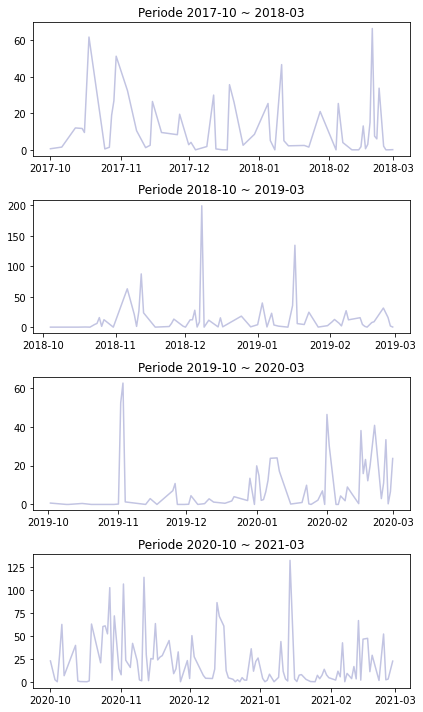

In [12]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(6,10))

axes[0].plot(df_periode1['curah_hujan'], color="#C2C4E2")
axes[0].set_title('Periode 2017-10 ~ 2018-03')

axes[1].plot(df_periode2['curah_hujan'], color="#C2C4E2")
axes[1].set_title('Periode 2018-10 ~ 2019-03')

axes[2].plot(df_periode3['curah_hujan'], color="#C2C4E2")
axes[2].set_title('Periode 2019-10 ~ 2020-03')

axes[3].plot(df_periode4['curah_hujan'], color="#C2C4E2")
axes[3].set_title('Periode 2020-10 ~ 2021-03')

plt.tight_layout()

### <p style="background-color:#C2C4E2;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">2.3 Boxplot 'curah_hujan' per periode</p>

In [13]:
# Note : Urutan bulan boxplots dibawah dimulai dari yang terkecil ke terbesar. Keep that in mind when analyzing.
# Mau diubah ke 10-11-12-01-02-03 tapi masih belum bisa

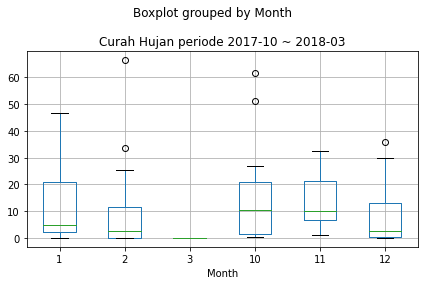

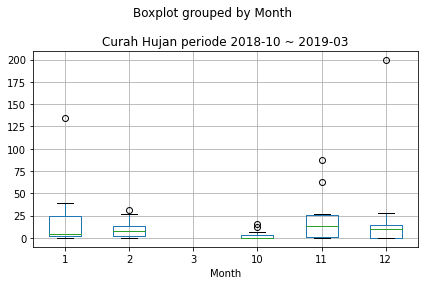

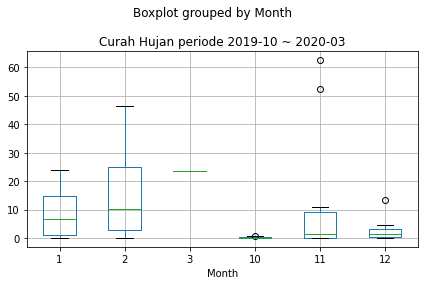

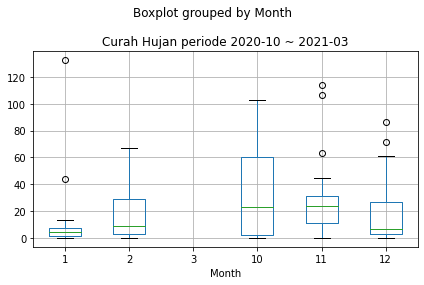

In [14]:
df_periode1.boxplot(column=['curah_hujan'], by='Month', figsize=(6, 4))
plt.title('Curah Hujan periode 2017-10 ~ 2018-03')
plt.tight_layout()

df_periode2.boxplot(column=['curah_hujan'], by='Month', figsize=(6, 4))
plt.title('Curah Hujan periode 2018-10 ~ 2019-03')
plt.tight_layout()

df_periode3.boxplot(column=['curah_hujan'], by='Month', figsize=(6, 4))
plt.title('Curah Hujan periode 2019-10 ~ 2020-03')
plt.tight_layout()

df_periode4.boxplot(column=['curah_hujan'], by='Month', figsize=(6, 4))
plt.title('Curah Hujan periode 2020-10 ~ 2021-03')
plt.tight_layout()


### <p style="background-color:#C2C4E2;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">2.4 Pairplot all features vs 'curah_hujan'</p>

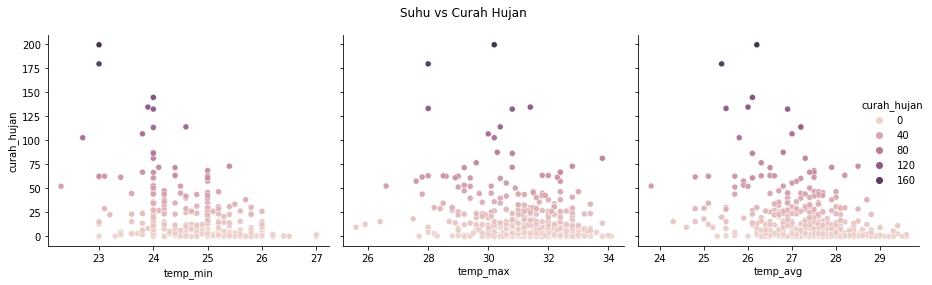

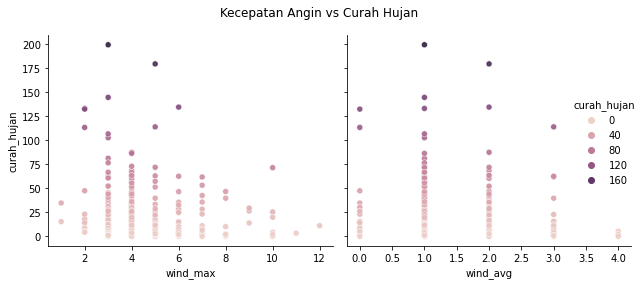

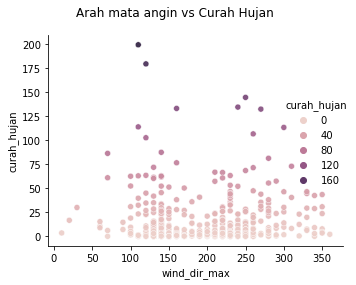

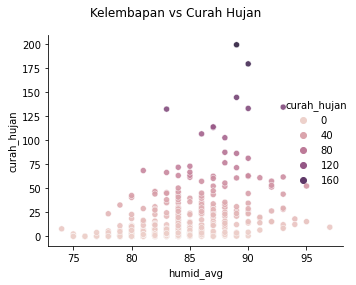

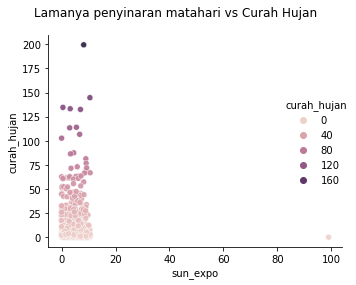

In [15]:
def pp(judul, *args):
    sns.pairplot(data=df, x_vars=args, y_vars=['curah_hujan'], height=4, aspect=1, kind='scatter', plot_kws={'alpha':0.9}, diag_kind = None, hue='curah_hujan')
    plt.suptitle(judul)
    plt.tight_layout()
    plt.show()
    
pp('Suhu vs Curah Hujan', 'temp_min', 'temp_max', 'temp_avg', )
pp('Kecepatan Angin vs Curah Hujan', 'wind_max', 'wind_avg')
pp('Arah mata angin vs Curah Hujan', 'wind_dir_max')
pp('Kelembapan vs Curah Hujan', 'humid_avg')
pp('Lamanya penyinaran matahari vs Curah Hujan', 'sun_expo')

### <p style="background-color:#C2C4E2;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">2.5 Person Correlation Matrix</p>

<AxesSubplot:>

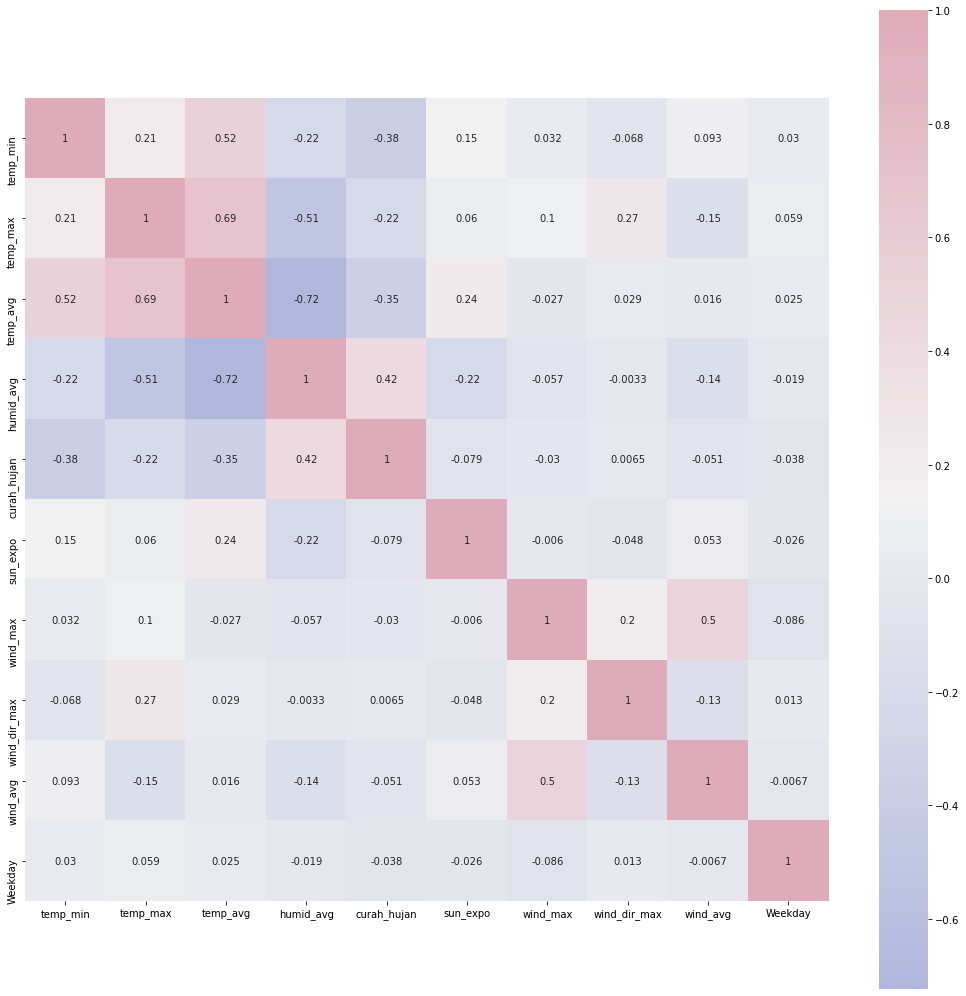

In [16]:
corrmat = df_filtered_2.corr()
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

### <p style="background-color:#C2C4E2;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">2.6 3D Scatter plot</p>

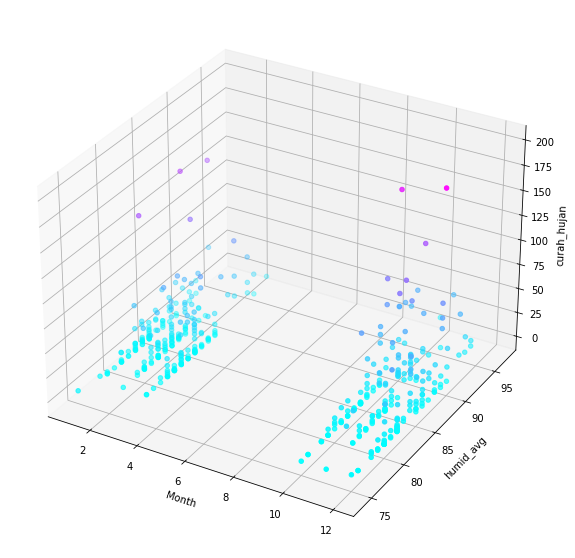

In [18]:
# Dari heatmap diatas kita ambil variabel dengan korelasi paling tinggi dengan curah_hujan yaitu humid_avg lalu kita buat scatter3D plotnya

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")

z_points = df['curah_hujan']
x_points = df['Month']
y_points = df['humid_avg']
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='cool');

ax.set_xlabel('Month')
ax.set_ylabel('humid_avg')
ax.set_zlabel('curah_hujan')

plt.show()

### <p style="background-color:#C2C4E2;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">2.7 Check Missing Data</p>

<AxesSubplot:>

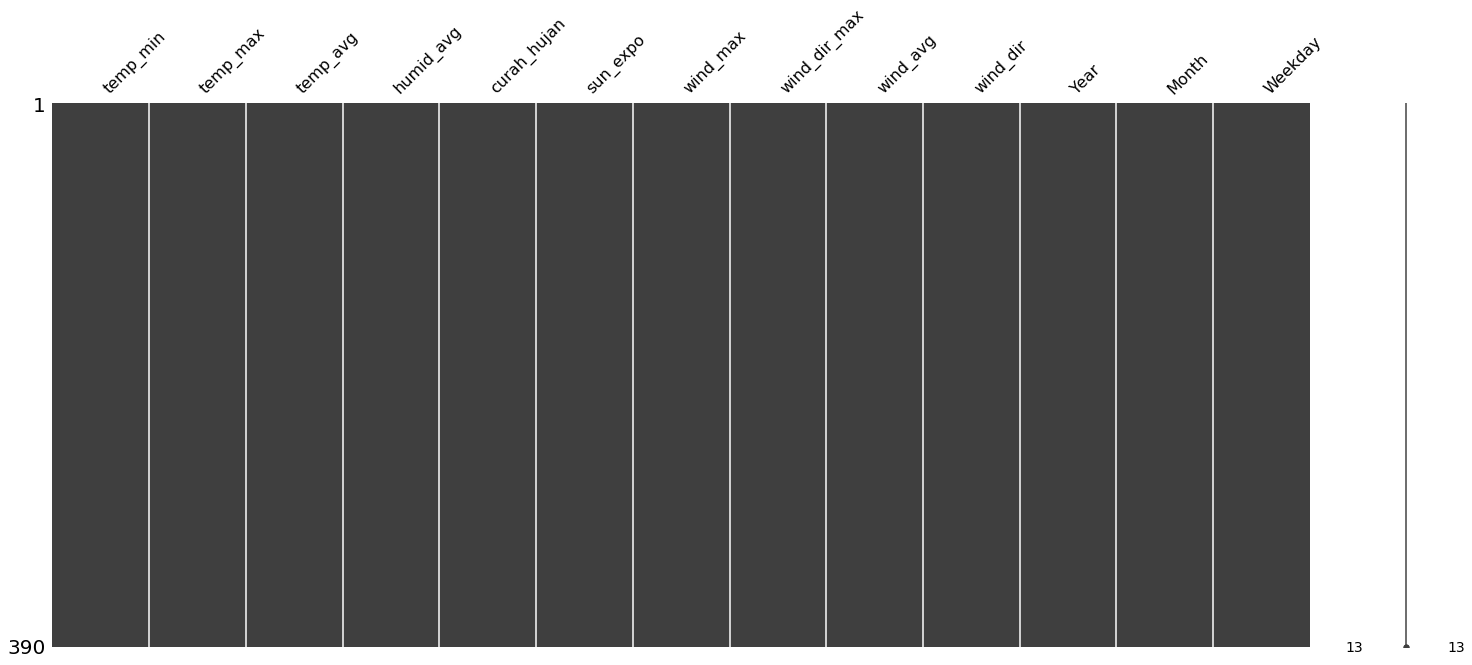

In [19]:
mno.matrix(df_filtered_2)

Setelah data cleaning, dapat dilihat sudah tidak ada lagi data yang missing.


## <p style="background-color:#C2C4E2;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">3. DATA PREPROCESSING</p>

**In this section** 
* Splitting Data into X and y
* OneHotEncoding
* Train-Test Split
* Feature Scaling


### <p style="background-color:#C2C4E2;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">3.1 Splitting Data into X and y</p>

#### 4.1.1 splitting data into X and y with categorical data

In [20]:
# Disini kita menggunakan 5 fitur
X = df_filtered_2.drop(['curah_hujan', 'wind_dir_max', 'Weekday'], axis=1)
y = df_filtered_2.loc[:, 'curah_hujan']

print(X.columns)

# Karena banyak tools yang mewajibkan kita menggunakan numpy array, maka kita ubah X dan y menjadi array
X_array = X.to_numpy()
y_array = y.to_numpy()

# Karena feature scaling expect 2-d array, kita perlu mengubah y menjadi 2-d dulu
y_array = y_array.reshape(len(y), 1)

Index(['temp_min', 'temp_max', 'temp_avg', 'humid_avg', 'sun_expo', 'wind_max',
       'wind_avg', 'wind_dir', 'Year', 'Month'],
      dtype='object')


In [21]:
# Show first 2 rows
print(X_array[:2, :])
print(y_array[:2, :])

[[25.0 29.3 27.4 82.0 7.0 6.0 4.0 'SE' 2017 10]
 [26.0 29.8 28.0 84.0 7.0 7.0 4.0 'SE' 2017 10]]
[[0.6]
 [1.5]]


#### 4.1.2 splitting data into X and y without categorical data


### <p style="background-color:#C2C4E2;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">3.2 OneHotEncoding</p>

We want to encode 'wind_dir', 'Year', 'Month'
Because those column is a pure Categorical, not ordinal data (like year 2019 is more blablabla than 2020)
in order to avoid ordinal interpretation we use OneHotEncoder

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# encode wind_dir
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-3])], remainder='passthrough')
X_array = ct.fit_transform(X_array) # remember in order to train ml model, it needs to be a numpy array

# encode year

year_ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-2])], remainder='passthrough')
X_array = year_ct.fit_transform(X_array)

# encode month

month_ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X_array = month_ct.fit_transform(X_array)

In [23]:
# for fixing
# ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

X_array = np.asarray(X_array).astype('float32')

In [24]:
# Show first 1 rows
print(X_array[:1, :])
print(y_array[:1, :])

[[ 0.   0.   0.   1.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   1.   0.   0.  25.  29.3 27.4 82.   7.   6.   4. ]]
[[0.6]]



### <p style="background-color:#C2C4E2;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">3.3 Train-Test Split</p>

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, train_size = 0.8, random_state = 1)


### <p style="background-color:#C2C4E2;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">3.4 Feature Scaling</p>

#### 4.4.1 feature scaling dengan data categorical

Karena kita hanya ingin men-scale nilai numerical, kita transform dataset dengan indexing [:, 18:]

In [26]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler() # We cannot use same scaler for both X and y
X_train[:, 18:] = sc_X.fit_transform(X_train[:, 18:])
y_train = sc_y.fit_transform(y_train).ravel()

# We also need to transform test set
X_test[:, 18:] = sc_X.transform(X_test[:, 18:])
y_test = sc_y.transform(y_test)

# Kalau mau ngeluarin real-result, jangan lupa gunakan inverse_transform

In [27]:
X_train.shape

(312, 26)

#### 4.4.2 feature scaling tanpa data categorical

In [28]:
X_train.shape

(312, 26)

## <p style="background-color:#C2C4E2;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">4. MODELING</p>

**In this section** 
* Linear Regression (Single Variable)
* Linear Regression (Multi Variables)
* Support Vector Regression (SVR)
* Decision Tree
* Random Forest
* Artificial Neural Network (ANN)
* Recurrent Neural Network (RNN)

### <p style="background-color:#C2C4E2;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">4.1 Linear Regression (Single Variable)</p>

Untuk melakukan regresi linear, kita perlu mengetahui independent variable mana yang paling berpengaruh ke dependent variabel (curah_hujan)

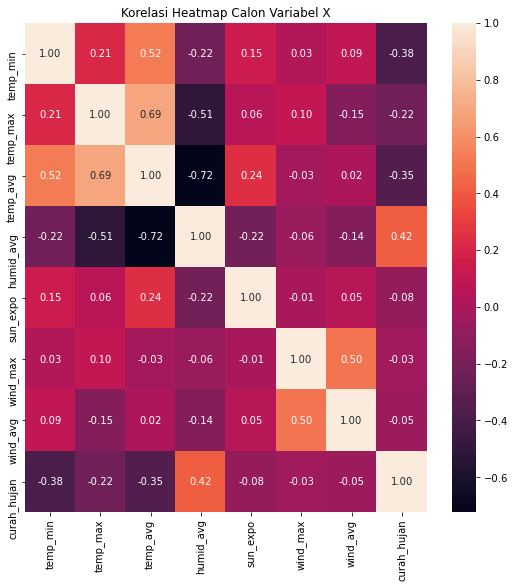

In [29]:
plt.figure(figsize=(9, 9))
sns.heatmap(pd.concat([X, y], axis=1).corr() ,annot=True ,fmt=".2f").set_title("Korelasi Heatmap Calon Variabel X")
plt.show()

Dari hasil visualisasi diatas, dapat diketahui humid_avg memiliki korelasi yang tinggi terhadap kolom curah_hujan / variabel dependent sehingga kita mengambil fitur/kolom humid_avg untuk di training

    Independent variabel(X) adalah humid_avg.
    Dependent variabel(y) adalah curah_hujan.



In [30]:
X_train[:1, :]

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.28867516, -0.03242825,
        -0.10821071, -0.94994885,  0.02948356, -0.3568618 ,  4.0519433 ,
         0.753395  ]], dtype=float32)

Jika kita perhatikan columns, berikut adalah urutannya:
'Month', 'Year', 'wind_dir', temp_min', 'temp_max', 'temp_avg', 'humid_avg', 'sun_expo', 'wind_max', 'wind_avg'

Oleh karena itu kita gunakan [:, -4]

In [31]:
# Kita ambil humid_avg saja dari train_test data, oleh karena itu kita menggunakan X_train[:, -4]


linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train[:, -4].reshape(-1, 1), y_train)

y_pred = linear_reg.predict(X_test[:, -4].reshape(-1, 1))

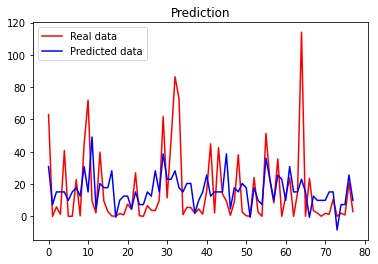

In [32]:
# Visual Evaluation
plt.plot(sc_y.inverse_transform(y_test), color = 'red', label = 'Real data')
plt.plot(sc_y.inverse_transform(y_pred), color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [33]:
# Model Evaluation

mse_linear_reg = mean_squared_error(y_test, y_pred)
mae_linear_reg = mean_absolute_error(y_test, y_pred)
r2_linear_reg = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae_linear_reg})")
print(f"Mean Square Error: {mse_linear_reg}")
print(f"R2-score: {r2_linear_reg}")

Mean Absolute Error: 0.6302548547647816)
Mean Square Error: 0.8050114562064533
R2-score: 0.18011865979281672


### <p style="background-color:#C2C4E2;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">4.2 Linear Regression (Multiple Variables)</p>

In [34]:
X_train[:1, [-7,-4]]

array([[-0.03242825,  0.02948356]], dtype=float32)

In [35]:
# Kita ambil humid_avg saja dari train_test data, oleh karena itu kita menggunakan X_train[:, -4]

from sklearn import linear_model

multi_reg = linear_model.LinearRegression()
multi_reg.fit(X_train[:, [-7,-4]], y_train)

y_pred = multi_reg.predict(X_test[:, [-7,-4]])

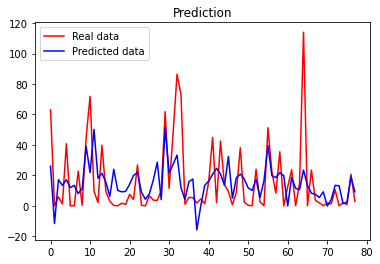

In [36]:
# Visual Evaluation
plt.plot(sc_y.inverse_transform(y_test), color = 'red', label = 'Real data')
plt.plot(sc_y.inverse_transform(y_pred), color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [37]:
# Model Evaluation

mse_multi_reg = mean_squared_error(y_test, y_pred)
mae_multi_reg = mean_absolute_error(y_test, y_pred)
r2_multi_reg = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae_multi_reg})")
print(f"Mean Square Error: {mse_multi_reg}")
print(f"R2-score: {r2_multi_reg}")

Mean Absolute Error: 0.5951334023037145)
Mean Square Error: 0.7371221180334884
R2-score: 0.24926202556468757


### <p style="background-color:#C2C4E2;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">4.3 Support Vector Regression (SVR)</p>

In [38]:
svr_lin = SVR(kernel='linear', C=1e3, gamma=0.1)
svr_poly = SVR(kernel='rbf', C=1e3)
svr_rbf = SVR(kernel='poly', C=1e3, degree=2)

svr_lin.fit(X_train[:, -4].reshape(-1, 1), y_train)
svr_rbf.fit(X_train[:, -4].reshape(-1, 1), y_train)
svr_poly.fit(X_train[:, -4].reshape(-1, 1), y_train)

y_lin = svr_lin.predict(X_test[:, -4].reshape(-1, 1))
y_rbf = svr_rbf.predict(X_test[:, -4].reshape(-1, 1))
y_poly = svr_poly.predict(X_test[:, -4].reshape(-1, 1))

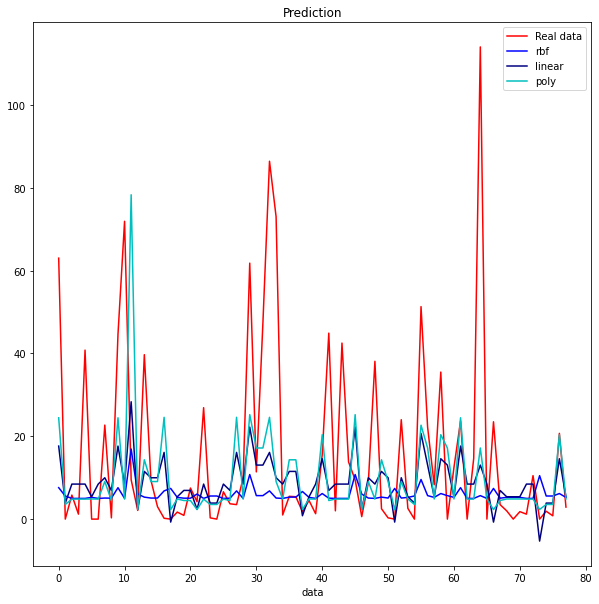

In [39]:
plt.figure(figsize=(10,10))
plt.plot(sc_y.inverse_transform(y_test), color = 'red', label = 'Real data')
plt.plot(sc_y.inverse_transform(y_rbf), color = 'blue', label = 'rbf')
plt.plot(sc_y.inverse_transform(y_lin), color = 'navy', label = 'linear')
plt.plot(sc_y.inverse_transform(y_poly), color = 'c', label = 'poly')
plt.title('Prediction')
plt.xlabel('data')
plt.legend()
plt.show()

In [40]:
# Model Evaluation

mse_svr_lin = mean_squared_error(y_test, y_lin)
mse_svr_poly = mean_squared_error(y_test, y_poly)
mse_svr_rbf = mean_squared_error(y_test, y_rbf)
mae_svr_lin = mean_absolute_error(y_test, y_lin)
mae_svr_poly = mean_absolute_error(y_test, y_poly)
mae_svr_rbf = mean_absolute_error(y_test, y_rbf)
r2_svr_lin = r2_score(y_test, y_lin)
r2_svr_poly = r2_score(y_test, y_poly)
r2_svr_rbf = r2_score(y_test, y_rbf)

print('SVR LINEAR')
print(f"Mean Absolute Error: {mae_svr_lin}")
print(f"Mean Square Error: {mse_svr_lin}")
print(f"R2-score: {r2_svr_lin}")
print('SVR POLYNOMIAL')
print(f"Mean Absolute Error: {mae_svr_poly}")
print(f"Mean Square Error: {mse_svr_poly}")
print(f"R2-score: {r2_svr_poly}")
print('SVR RBF')
print(f"Mean Absolute Error: {mae_svr_rbf}")
print(f"Mean Square Error: {mse_svr_rbf}")
print(f"R2-score: {r2_svr_rbf}")

SVR LINEAR
Mean Absolute Error: 0.5687432789057697
Mean Square Error: 0.9242305865457271
R2-score: 0.058697356273092915
SVR POLYNOMIAL
Mean Absolute Error: 0.5794669164483334
Mean Square Error: 0.9888775929974563
R2-score: -0.007143786584423273
SVR RBF
Mean Absolute Error: 0.6196898880818237
Mean Square Error: 1.148222840295454
R2-score: -0.1694324023588829


### <p style="background-color:#C2C4E2;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">4.4 Decision Tree</p>

In [41]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

y_pred = dt_reg.predict(X_test)

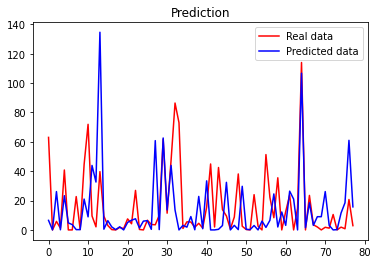

In [42]:
# Visual Evaluation
plt.plot(sc_y.inverse_transform(y_test), color = 'red', label = 'Real data')
plt.plot(sc_y.inverse_transform(y_pred), color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [43]:
# Model Evaluation

mse_dt_reg = mean_squared_error(y_test, y_pred)
mae_dt_reg = mean_absolute_error(y_test, y_pred)
r2_dt_reg = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae_dt_reg}")
print(f"Mean Square Error: {mse_dt_reg}")
print(f"R2-score: {r2_dt_reg}")

Mean Absolute Error: 0.6804411035995667
Mean Square Error: 1.1942248543709628
R2-score: -0.21628414920257666


### <p style="background-color:#C2C4E2;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">4.5 Random Forest</p>

In [44]:

rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)

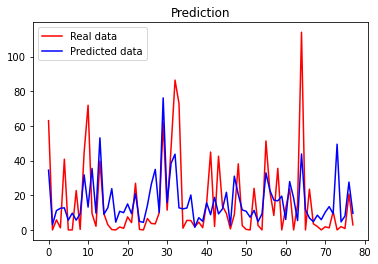

In [45]:
# Visual Evaluation
plt.plot(sc_y.inverse_transform(y_test), color = 'red', label = 'Real data')
plt.plot(sc_y.inverse_transform(y_pred), color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [46]:
# Model Evaluation

mse_rf_reg = mean_squared_error(y_test, y_pred)
mae_rf_reg = mean_absolute_error(y_test, y_pred)
r2_rf_reg = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae_rf_reg}")
print(f"Mean Square Error: {mse_rf_reg}")
print(f"R2-score: {r2_rf_reg}")

Mean Absolute Error: 0.5811267462102878
Mean Square Error: 0.6974191133122489
R2-score: 0.28969841000385976


### <p style="background-color:#C2C4E2;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">4.6 Artificial Neural Network (ANN)</p>

Karena contoh yang digunakan di module merupakan contoh ANN classification, saya gunakan referensi dari luar

source : https://stackoverflow.com/questions/49008074/how-to-create-a-neural-network-for-regression

In [47]:
print(X_train[:1])
print(X_train.shape)

[[ 1.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          1.          1.
   0.          0.          0.          0.          0.          0.
  -0.28867516 -0.03242825 -0.10821071 -0.94994885  0.02948356 -0.3568618
   4.0519433   0.753395  ]]
(312, 26)


In [48]:
print(f"input dim = {X_train.shape[1:]}")

input dim = (26,)


In [49]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(6, activation = 'relu', input_dim = 26))

# Adding the second hidden layer
model.add(Dense(units = 6, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 6, activation = 'relu'))

# Adding the output layer

model.add(Dense(units = 1))

#model.add(Dense(1))
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = 32, epochs = 200)

y_pred = model.predict(X_test)

Epoch 1/200
10/10 [==============================] - 1s 3ms/step - loss: 0.9852
Epoch 2/200
10/10 [==============================] - 0s 3ms/step - loss: 0.9579
Epoch 3/200
10/10 [==============================] - 0s 2ms/step - loss: 0.9367
Epoch 4/200
10/10 [==============================] - 0s 3ms/step - loss: 0.9168
Epoch 5/200
10/10 [==============================] - 0s 3ms/step - loss: 0.8997
Epoch 6/200
10/10 [==============================] - 0s 2ms/step - loss: 0.8800
Epoch 7/200
10/10 [==============================] - 0s 3ms/step - loss: 0.8620
Epoch 8/200
10/10 [==============================] - 0s 3ms/step - loss: 0.8412
Epoch 9/200
10/10 [==============================] - 0s 2ms/step - loss: 0.8244
Epoch 10/200
10/10 [==============================] - 0s 3ms/step - loss: 0.8089
Epoch 11/200
10/10 [==============================] - 0s 4ms/step - loss: 0.7885
Epoch 12/200
10/10 [==============================] - 0s 3ms/step - loss: 0.7735
Epoch 13/200
10/10 [=================

10/10 [==============================] - 0s 2ms/step - loss: 0.3211
Epoch 102/200
10/10 [==============================] - 0s 2ms/step - loss: 0.3208
Epoch 103/200
10/10 [==============================] - 0s 3ms/step - loss: 0.3167
Epoch 104/200
10/10 [==============================] - 0s 2ms/step - loss: 0.3171
Epoch 105/200
10/10 [==============================] - 0s 3ms/step - loss: 0.3147
Epoch 106/200
10/10 [==============================] - 0s 3ms/step - loss: 0.3109
Epoch 107/200
10/10 [==============================] - 0s 2ms/step - loss: 0.3076
Epoch 108/200
10/10 [==============================] - 0s 3ms/step - loss: 0.3072
Epoch 109/200
10/10 [==============================] - 0s 3ms/step - loss: 0.3029
Epoch 110/200
10/10 [==============================] - 0s 4ms/step - loss: 0.3037
Epoch 111/200
10/10 [==============================] - 0s 3ms/step - loss: 0.3000
Epoch 112/200
10/10 [==============================] - 0s 2ms/step - loss: 0.2978
Epoch 113/200
10/10 [=========

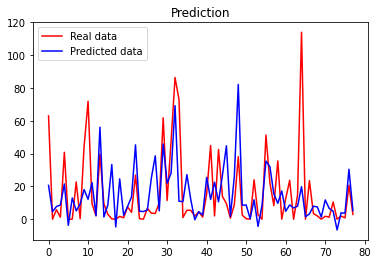

In [51]:
# Visual Evaluation
plt.plot(sc_y.inverse_transform(y_test), color = 'red', label = 'Real data')
plt.plot(sc_y.inverse_transform(y_pred), color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [52]:
# Model Evaluation

mse_ann_reg = mean_squared_error(y_test, y_pred)
mae_ann_reg = mean_absolute_error(y_test, y_pred)
r2_ann_reg = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae_ann_reg}")
print(f"Mean Square Error: {mse_ann_reg}")
print(f"R2-score: {r2_ann_reg}")

Mean Absolute Error: 0.6096611171043441
Mean Square Error: 0.8260663872591573
R2-score: 0.15867480957631297


### <p style="background-color:#C2C4E2;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">4.7 Recurrent Neural Network (RNN)</p>

## <p style="background-color:#C2C4E2;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">5. MODEL EVALUATION AND HYPERPARAMETER TUNING</p>

### <p style="background-color:#C2C4E2;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">5.1 Mean Absolute Error (RNN)</p>

In [53]:
models = pd.DataFrame({'Model': ['Linear Regression', 'Multiple Linear Regression', 'SVR (linear kernel)', 'SVR (poly kernel)', 'SVR (rbf kernel)', 'Decision Tree', 'Random Forest Regression', 'ANN'],
                       'Score': [mae_linear_reg, mae_multi_reg, mae_svr_lin, mae_svr_poly, mae_svr_rbf,  mae_dt_reg, mae_rf_reg, mae_ann_reg]})

models.sort_values(by = 'Score', ascending = True, ignore_index = True)


Model     Score
0         SVR (linear kernel)  0.568743
1           SVR (poly kernel)  0.579467
2    Random Forest Regression  0.581127
3  Multiple Linear Regression  0.595133
4                         ANN  0.609661
5            SVR (rbf kernel)  0.619690
6           Linear Regression  0.630255
7               Decision Tree  0.680441

Note : Lower MAE are better.

### <p style="background-color:#C2C4E2;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">5.2 R2</p>

In [54]:
models = pd.DataFrame({'Model': ['Linear Regression', 'Multiple Linear Regression', 'SVR (linear kernel)', 'SVR (poly kernel)', 'SVR (rbf kernel)', 'Decision Tree', 'Random Forest Regression', 'ANN'],
                       'Score': [r2_linear_reg, r2_multi_reg, r2_svr_lin, r2_svr_poly, r2_svr_rbf, r2_dt_reg, r2_rf_reg, r2_ann_reg]})

models.sort_values(by = 'Score', ascending = False, ignore_index = True)


Model     Score
0    Random Forest Regression  0.289698
1  Multiple Linear Regression  0.249262
2           Linear Regression  0.180119
3                         ANN  0.158675
4         SVR (linear kernel)  0.058697
5           SVR (poly kernel) -0.007144
6            SVR (rbf kernel) -0.169432
7               Decision Tree -0.216284

Note : Higher R2 score are better.

### <p style="background-color:#C2C4E2;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">5.3 K-fold cross validation</p>

It is important to not get too carried away with models with impressive training accuracy as what we should focus on instead is the model's ability to predict out-of-samples data, in other words, data our model has not seen before.

This is where k-fold cross validation comes in. K-fold cross validation is a technique whereby a subset of our training set is kept aside and will act as holdout set for testing purposes. Here is a great [video](https://www.youtube.com/watch?v=fSytzGwwBVw) explaining the concept in more detail. 

In [ ]:
# Create a list which contains regressors

regressors = []

regressors.append(DecisionTreeRegressor())
regressors.append(RandomForestRegressor())


len(regressors)

In [ ]:
# Create a list which contains cross validation results for each classifier

cv_results = []
for regressor in regressors:
    cv_results.append(cross_val_score(regressor, X_train, y_train, scoring = 'r2', cv = 10))

In [ ]:
# Mean and standard deviation of cross validation results for each classifier  

cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [ ]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Decision Tree', 'Random Forest Regression']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

In [ ]:
sns.barplot('Cross Validation Mean', 'Algorithm', data = cv_res, order = cv_res.sort_values(by = 'Cross Validation Mean', ascending = False)['Algorithm'], palette = 'Set3', **{'xerr': cv_std})
plt.ylabel('Algorithm')
plt.title('Cross Validation Scores')